In [84]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Concatenate, Input
from tensorflow.keras.utils import to_categorical
import numpy as np


In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [19]:
from google.colab import files
uploaded = files.upload()

Saving Dataset-SA.csv to Dataset-SA.csv


In [4]:
df = pd.read_csv("Dataset-SA.csv")

In [5]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [19]:
df_new = df.dropna(subset=['Summary', 'Review'])

In [20]:
df_new.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


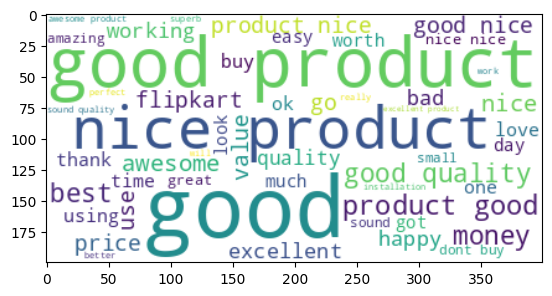

In [21]:
text = ' '.join(df_new["Summary"].tolist())
wordcloud  = WordCloud(background_color='white', colormap='viridis', contour_color='steelblue', max_words=50).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

<Axes: xlabel='Sentiment'>

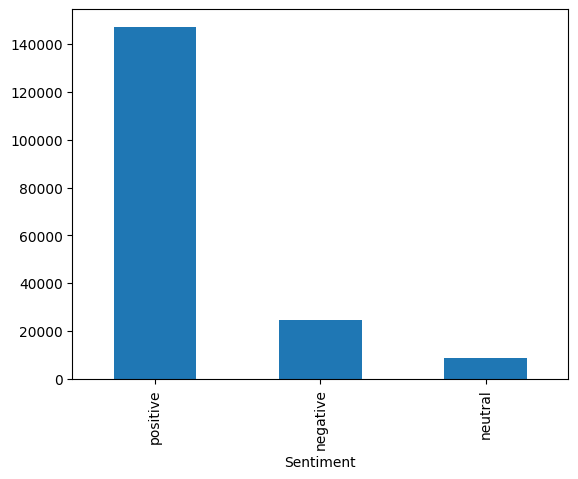

In [22]:
df_new.Sentiment.value_counts().plot.bar()

<Axes: xlabel='Rate'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 131 (\x83) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


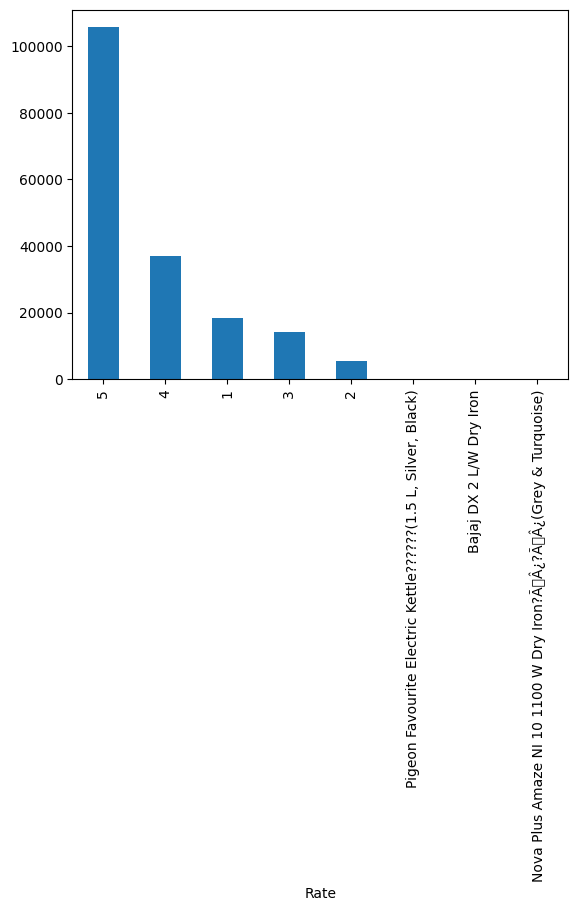

In [23]:
df_new.Rate.value_counts().plot.bar()

In [24]:
from sklearn.model_selection import train_test_split

df_new['Sentiment'] = df_new['Sentiment'].astype('category').cat.codes
df_new.head()

<ipython-input-24-9ccdb9c594b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Sentiment'] = df_new['Sentiment'].astype('category').cat.codes


,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,2
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,2
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,2
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,0
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,1


In [25]:
df_new.isna().sum()

,0
product_name,0
product_price,0
Rate,0
Review,0
Summary,0
Sentiment,0


In [85]:
X_sum = df_new['Summary'].values
X_rev = df_new['Review'].values
Y = df_new['Sentiment'].values

tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(np.concatenate((X_sum, X_rev)))
X_st = tokenizer.texts_to_sequences(X_sum)
X_st = pad_sequences(X_st, maxlen=50)

X_rt = tokenizer.texts_to_sequences(X_rev)
X_rt = pad_sequences(X_rt, maxlen=50)


In [87]:
# Define the input shapes
input_shape_summary = X_st_train.shape[1]
input_shape_review = X_rt_train.shape[1]

input_summary = Input(shape=(input_shape_summary,))
input_review = Input(shape=(input_shape_review,))

# Embedding layers
embedding_summary = Embedding(input_dim=5000, output_dim=embedding_dim, input_length=input_shape_summary)(input_summary)
embedding_review = Embedding(input_dim=5000, output_dim=embedding_dim, input_length=input_shape_review)(input_review)

# LSTM layers
lstm_summary = LSTM(128)(embedding_summary)
lstm_review = LSTM(128)(embedding_review)

# Gabung LSTM layer
concatenated = Concatenate()([lstm_summary, lstm_review])

# connected Dense layer
dense = Dense(128, activation='relu')(concatenated)

# Output layer
output = Dense(3, activation='softmax')(dense)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [91]:
X_st_train, X_st_test, X_rt_train, X_rt_test, Y_train, Y_test = train_test_split(X_st, X_rt, Y, test_size=0.2, random_state=42)

embedding_dim = 128

In [92]:
Y_train_encoded = to_categorical(Y_train, num_classes=3)
Y_test_encoded = to_categorical(Y_test, num_classes=3)

In [93]:
model = Model(inputs=[input_summary, input_review], outputs=output)

In [94]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [98]:
history = model.fit([X_st_train, X_rt_train], Y_train_encoded, epochs=3, batch_size=32, validation_data=([X_st_test, X_rt_test], Y_test_encoded))


Epoch 1/3
4510/4510 ━━━━━━━━━━━━━━━━━━━━ 971s 215ms/step - accuracy: 0.9834 - loss: 0.0490 - val_accuracy: 0.9458 - val_loss: 0.2827
Epoch 2/3
4510/4510 ━━━━━━━━━━━━━━━━━━━━ 978s 214ms/step - accuracy: 0.9842 - loss: 0.0456 - val_accuracy: 0.9467 - val_loss: 0.2973
Epoch 3/3
4510/4510 ━━━━━━━━━━━━━━━━━━━━ 972s 212ms/step - accuracy: 0.9848 - loss: 0.0438 - val_accuracy: 0.9446 - val_loss: 0.3063


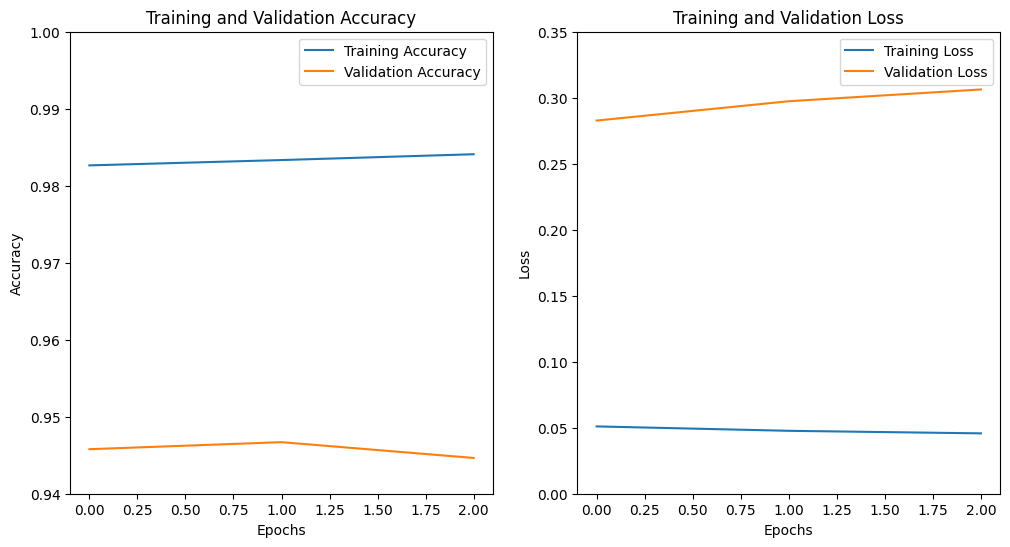

In [102]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0.94, 1)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0, 0.35)

plt.show()

In [104]:
loss, accuracy = model.evaluate([X_st_test, X_rt_test], Y_test_encoded, verbose=1)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

1128/1128 ━━━━━━━━━━━━━━━━━━━━ 69s 61ms/step - accuracy: 0.9447 - loss: 0.3051
Test Loss: 0.30899831652641296
Test Accuracy: 0.9448941349983215
